# <div align="center"> TMDB

# <div align="center"><span style="color:#0E6BA8; font-family: 'Bebas Neue'; font-size: 4em;">TMDB</span> 

## Importing and Cleaning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#path = "C:\\Users\\lenovo\\Documents\\Aqsa\\Digital Futures\\3 - Programmatic Data Wrangling\\TMBD\\TMDB_movies.csv"
path="TMDB_movies.csv"
df=pd.read_csv(path)

In [9]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [16]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [324]:
df.sort_values(by='budget', ascending = True)[df['budget']!=0][['budget', 'keywords', 'title', 'vote_count']] .head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5648\4192772544.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(by='budget', ascending = True)[df['budget']!=0][['budget', 'keywords', 'title', 'vote_count']] .head()


,budget,keywords,title,vote_count
4251,1,"[{""id"": 10183, ""name"": ""independent film""}]",Fetching Cody,6
4247,1,[],Me You and Five Bucks,2
4369,1,"[{""id"": 10183, ""name"": ""independent film""}]",Slam,7
4262,1,[],Incident at Loch Ness,18
4424,1,"[{""id"": 10352, ""name"": ""phobia""}, {""id"": 13005...",Fear Clinic,42


### RegEx

In [8]:
import re

In [10]:
df['genre_id']=df['genres'].str.findall(r'\{"id":( \d+), "name": "[A-Z][a-z]+\s*[A-Z]?[a-z]*"\}')

In [12]:
df['genre_name']=df['genres'].str.findall(r'\{"id": \d+, "name": "([A-Z][a-z]+\s*[A-Z]?[a-z]*)"\}')

In [14]:
df[['genre_id', 'genre_name','genres']]

,genre_id,genre_name,genres
0,"[ 28, 12, 14, 878]","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[ 12, 14, 28]","[Adventure, Fantasy, Action]","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[ 28, 12, 80]","[Action, Adventure, Crime]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[ 28, 80, 18, 53]","[Action, Crime, Drama, Thriller]","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[ 28, 12, 878]","[Action, Adventure, Science Fiction]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...,...
4798,"[ 28, 80, 53]","[Action, Crime, Thriller]","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4799,"[ 35, 10749]","[Comedy, Romance]","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4800,"[ 35, 18, 10749]","[Comedy, Drama, Romance]","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4801,[],[],[]


In [97]:
df.columns

Index(['budget', 'genre_ids', 'genre_names', 'genres', 'homepage', 'id',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [16]:
df.rename(columns = {'genre_id':'genre_ids' , 'genre_name': 'genre_names'}, inplace = True)

In [18]:
df.insert(1, 'genre_ids', df.pop('genre_ids'))

In [20]:
df.insert(2, 'genre_names', df.pop('genre_names'))

Alex's given code but using it for production companies instead

In [22]:
## Function to extract genres for each datapoint
import ast ## This module can be used to evaluate literals, eg: transform string-lists back into lists
def extract_list(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    List = [] ## Empty list to store the genres
    
    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        List.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return List

## Apply the function to genres
df['extracted_production_companies'] = df['production_companies'].apply(extract_list)

In [31]:
df.insert(11, 'extracted_production_companies', df.pop('extracted_production_companies'))

In [33]:
pd.set_option('display.max_columns', None)
df.head()

,budget,genre_ids,genre_names,genres,homepage,id,keywords,original_language,original_title,overview,popularity,extracted_production_companies,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[ 28, 12, 14, 878]","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[ 12, 14, 28]","[Adventure, Fantasy, Action]","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[ 28, 12, 80]","[Action, Adventure, Crime]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[ 28, 80, 18, 53]","[Action, Crime, Drama, Thriller]","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[ 28, 12, 878]","[Action, Adventure, Science Fiction]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Graphs

### Counting movies in a genre

In [43]:
df[['title','genre_names']]

,title,genre_names
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"
...,...,...
4798,El Mariachi,"[Action, Crime, Thriller]"
4799,Newlyweds,"[Comedy, Romance]"
4800,"Signed, Sealed, Delivered","[Comedy, Drama, Romance]"
4801,Shanghai Calling,[]


In [352]:
df_exploded_genres = df.explode('genre_names').copy()

In [342]:
df_exploded_genres.shape

(12180, 23)

In [361]:
genre_table = df_exploded_genres.groupby('genre_names')['title'].count().reset_index()

In [363]:
#genre_table = df_exploded_genres.groupby('genre_names')['title'].apply(list).reset_index().copy()
genre_table

,genre_names,title
0,Action,1154
1,Adventure,790
2,Animation,234
3,Comedy,1722
4,Crime,696
5,Documentary,110
6,Drama,2297
7,Family,513
8,Fantasy,424
9,Foreign,34


In [102]:
genre_table['count_movies']= genre_table['title'].apply(len)

In [104]:
genre_table

,genre_names,title,count_movies
0,Action,"[Avatar, Pirates of the Caribbean: At World's ...",1154
1,Adventure,"[Avatar, Pirates of the Caribbean: At World's ...",790
2,Animation,"[Tangled, Monsters University, Cars 2, Toy Sto...",234
3,Comedy,"[Men in Black 3, Cars 2, Toy Story 3, Brave, R...",1722
4,Crime,"[Spectre, The Dark Knight Rises, Quantum of So...",696
5,Documentary,"[Oceans, This Is It, Winged Migration, Jackass...",110
6,Drama,"[The Dark Knight Rises, King Kong, Titanic, Wo...",2297
7,Family,"[Tangled, Harry Potter and the Half-Blood Prin...",513
8,Fantasy,"[Avatar, Pirates of the Caribbean: At World's ...",424
9,Foreign,"[Bon voyage, Pandaemonium, Machine Gun McCain,...",34


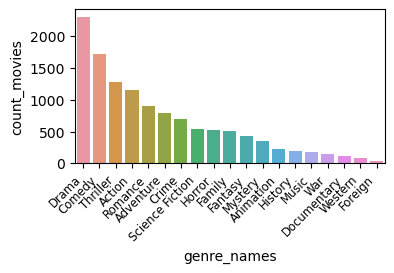

In [112]:
plt.figure(figsize = (4,2)) # setting the size of the output



sns.barplot( data = genre_table.sort_values(by='count_movies', ascending = False),
             x = 'genre_names',
             y = 'count_movies',
            #hue='User Rating',  ## colours according to column and get a legend
             #palette = 'flare' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation= 45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           #verticalalignment='bottom'
           fontweight = 'light' ,
           fontsize = 'small' # setting the fonts
          )
#changing y axis limits
# ax=plt.gca()
# ax.set_ylim([4.5, 5])
# # or plt.ylim(4.5,5)

# plt.title('Highest Rated Authors\n') # naming the plot #\n adds new line after text 
plt.show()

In [118]:
genre_table_2 = df_exploded_genres.groupby('genre_names').agg({'title': 'count', 'budget': 'sum', 'revenue': 'sum'}).reset_index().copy()

In [120]:
genre_table_2

,genre_names,title,budget,revenue
0,Action,1154,59443406599,162959914515
1,Adventure,790,52398220463,164841561551
2,Animation,234,15553021056,52812167865
3,Comedy,1722,43589711809,122760517608
4,Crime,696,19383466474,46040860686
5,Documentary,110,291861725,1082277678
6,Drama,2297,47498112157,119710983984
7,Family,513,26019109625,83283238689
8,Fantasy,424,26949696595,81982199925
9,Foreign,34,22375007,12398151


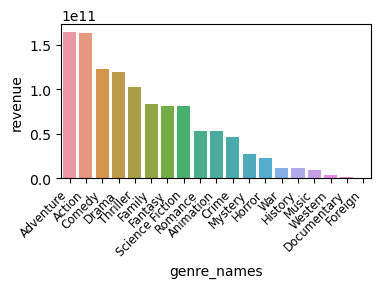

In [122]:
plt.figure(figsize = (4,2)) # setting the size of the output



sns.barplot( data = genre_table_2.sort_values(by='revenue', ascending = False),
             x = 'genre_names',
             y = 'revenue',
            #hue='User Rating',  ## colours according to column and get a legend
             #palette = 'flare' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation= 45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           #verticalalignment='bottom'
           fontweight = 'light' ,
           fontsize = 'small' # setting the fonts
          )
#changing y axis limits
# ax=plt.gca()
# ax.set_ylim([4.5, 5])
# # or plt.ylim(4.5,5)

# plt.title('Highest Rated Authors\n') # naming the plot #\n adds new line after text 
plt.show()

Are there any movies with all these genres?

In [256]:
genres_to_check=['Adventure','Action','Comedy','Drama','Thriller']

In [258]:
df[df['genre_names'].apply(lambda x: all(item in x for item in genres_to_check))][['title','genre_names']]

,title,genre_names
2442,Southland Tales,"[Action, Adventure, Comedy, Drama, Science Fic..."


In [260]:
df[df['title'] == 'Southland Tales']

,budget,genre_ids,genre_names,genres,homepage,id,keywords,original_language,original_title,overview,popularity,extracted_production_companies,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2442,17000000,"[ 28, 12, 35, 18, 878, 53]","[Action, Adventure, Comedy, Drama, Science Fic...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://darko.com/film_southlandtales.html,4723,"[{""id"": 236, ""name"": ""suicide""}, {""id"": 380, ""...",en,Southland Tales,Set in the futuristic landscape of Los Angeles...,9.349386,"[Universal Pictures, Destination Films, Persis...","[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2006-05-15,374743,144.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Have a nice apocalypse.,Southland Tales,5.2,153


No ;(

How about just adventure, action and drama?

In [266]:
genres_to_check=['Adventure','Action','Comedy','Drama']

In [381]:
df[df['genre_names']
   .apply(lambda x: all(item in x for item in genres_to_check))]\
[['title','genre_names','revenue']].sort_values(by = 'revenue' , ascending = False) 

,title,genre_names,revenue
103,The Sorcerer's Apprentice,"[Fantasy, Adventure, Action, Comedy, Drama]",215283742
167,Sahara,"[Action, Adventure, Comedy, Drama, Mystery]",119269486
2827,Crossroads,"[Action, Adventure, Comedy, Drama, Family, Mus...",61141030
3352,Action Jackson,"[Action, Adventure, Comedy, Crime, Drama]",20256975
2442,Southland Tales,"[Action, Adventure, Comedy, Drama, Science Fic...",374743
1973,Double Take,"[Adventure, Drama, Action, Comedy, Romance]",0
4004,Silver Medalist,"[Action, Adventure, Comedy, Drama, Foreign]",0


##### Noticed the 0 in revenue:

In [211]:
revenue = df.sort_values(by = 'revenue')[['title', 'revenue']].copy()

In [218]:
revenue[revenue['revenue'] != 0].head(20)

,title,revenue
3372,Split Second,5
3875,Dreaming of Joseph Lees,7
3419,Bran Nue Dae,7
3428,Bats,10
3131,Of Horses and Men,11
2933,F.I.S.T.,11
1655,Chasing Liberty,12
2485,The Cookout,12
1912,Angela's Ashes,13
1771,The 51st State,14


In [238]:
revenue[((revenue['revenue']/10000) < 1) & (revenue['revenue'] != 0)]

,title,revenue
3372,Split Second,5
3875,Dreaming of Joseph Lees,7
3419,Bran Nue Dae,7
3428,Bats,10
3131,Of Horses and Men,11
2933,F.I.S.T.,11
1655,Chasing Liberty,12
2485,The Cookout,12
1912,Angela's Ashes,13
1771,The 51st State,14


###

### Compare with the the top ten revenue movies (not accurate)

In [299]:
top_10 = df.sort_values(by = 'revenue', ascending = False)[['title','revenue','genre_names']].head(10)

In [303]:
chosen_movies = df.iloc[[103,2442]][['title','revenue','genre_names']]

In [305]:
my_movies = pd.concat([top_10, chosen_movies])
my_movies

,title,revenue,genre_names
0,Avatar,2787965087,"[Action, Adventure, Fantasy, Science Fiction]"
25,Titanic,1845034188,"[Drama, Romance, Thriller]"
16,The Avengers,1519557910,"[Science Fiction, Action, Adventure]"
28,Jurassic World,1513528810,"[Action, Adventure, Science Fiction, Thriller]"
44,Furious 7,1506249360,[Action]
7,Avengers: Age of Ultron,1405403694,"[Action, Adventure, Science Fiction]"
124,Frozen,1274219009,"[Animation, Adventure, Family]"
31,Iron Man 3,1215439994,"[Action, Adventure, Science Fiction]"
546,Minions,1156730962,"[Family, Animation, Adventure, Comedy]"
26,Captain America: Civil War,1153304495,"[Adventure, Action, Science Fiction]"


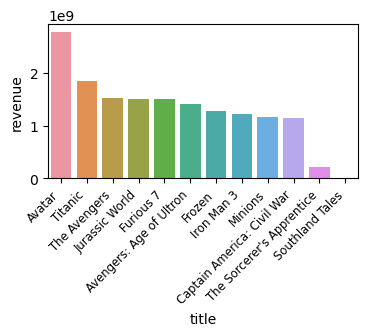

In [297]:
plt.figure(figsize = (4,2)) # setting the size of the output



sns.barplot( data = my_movies,
             x = 'title',
             y = 'revenue',
            #hue='User Rating',  ## colours according to column and get a legend
             #palette = 'flare' # setting the colours
           )

# We can also adjust the labels
plt.xticks(rotation= 45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           #verticalalignment='bottom'
           fontweight = 'light' ,
           fontsize = 'small' # setting the fonts
          )
#changing y axis limits
# ax=plt.gca()
# ax.set_ylim([4.5, 5])
# # or plt.ylim(4.5,5)

# plt.title('Highest Rated Authors\n') # naming the plot #\n adds new line after text 
plt.show()